In [1]:
# Two required libraries
import numpy as np # Used for linear algebra
import pandas as pd # Used for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
np.random.seed(2)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')


Using TensorFlow backend.


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

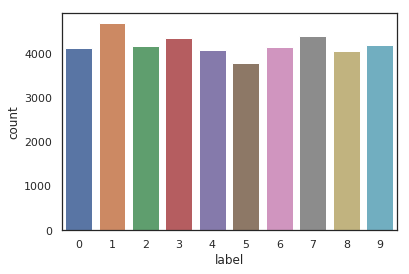

In [4]:
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")

Y_train = train_data['label']
X_train = train_data.drop(labels = ['label'], axis = 1)

del train_data

g = sns.countplot(Y_train)
Y_train.value_counts()

In [5]:
X_train.isnull().any().sum()
test_data.isnull().any().sum()

0

In [6]:
# Normalize the data
X_train = X_train/255.0
test_data = test_data/255.0

In [7]:
# Reshape the Image
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_data = test_data.values.reshape(-1, 28, 28, 1)

In [8]:
# Convert the Y value into categorical form
num_classes = 10
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Y_train = to_categorical(Y_train, num_classes)

In [9]:
# Split the dataset
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state = 2, test_size = 0.1)

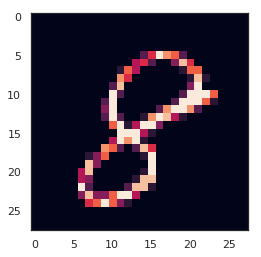

In [10]:
plt.imshow(X_train[0][:,:,0])

In [11]:
from keras import backend as K

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [12]:
from tensorflow.python.keras.optimizers import RMSprop

In [13]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
# learning_rate_reduction = ReduceLROnPlateau(monitor= 'val_acc', patience = 3, verbose = 1,factor= 0.5, min_lr= 0.00001)

In [15]:
epochs = 20
batch_size = 86 # mini batch gradient descent 

In [16]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [17]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              )

Epoch 1/20
439/439 - 12s - loss: 0.5322 - acc: 0.8253 - val_loss: 0.1211 - val_acc: 0.9674
Epoch 2/20
439/439 - 9s - loss: 0.1256 - acc: 0.9645 - val_loss: 0.0565 - val_acc: 0.9869
Epoch 3/20
439/439 - 9s - loss: 0.0973 - acc: 0.9725 - val_loss: 0.0493 - val_acc: 0.9879
Epoch 4/20
439/439 - 9s - loss: 0.0786 - acc: 0.9783 - val_loss: 0.0379 - val_acc: 0.9900
Epoch 5/20
439/439 - 9s - loss: 0.0719 - acc: 0.9807 - val_loss: 0.0429 - val_acc: 0.9883
Epoch 6/20
439/439 - 9s - loss: 0.0743 - acc: 0.9807 - val_loss: 0.0418 - val_acc: 0.9912
Epoch 7/20
439/439 - 9s - loss: 0.0762 - acc: 0.9821 - val_loss: 0.0448 - val_acc: 0.9895
Epoch 8/20
439/439 - 9s - loss: 0.0727 - acc: 0.9816 - val_loss: 0.0373 - val_acc: 0.9900
Epoch 9/20
439/439 - 10s - loss: 0.0765 - acc: 0.9810 - val_loss: 0.0335 - val_acc: 0.9905
Epoch 10/20
439/439 - 9s - loss: 0.0755 - acc: 0.9815 - val_loss: 0.0366 - val_acc: 0.9926
Epoch 11/20
439/439 - 9s - loss: 0.0774 - acc: 0.9819 - val_loss: 0.0368 - val_acc: 0.9895
Epoch 

In [18]:
# predict results
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [19]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)